In [1]:

import pandas as pd  # Import pandas library for data manipulation and analysis
from sklearn.linear_model import LinearRegression  # Import LinearRegression class from scikit-learn for linear regression modeling
from sklearn.model_selection import train_test_split  # Import train_test_split function for splitting the dataset into train and test sets
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function for evaluating model performance
import matplotlib.pyplot as plt  # Import matplotlib.pyplot module for data visualization
import seaborn as sns  # Import seaborn library for advanced data visualization



Let's start by reading in our .csv. This dataset contains information about the cost of living in almost 5000 cities across the world.  
To draw conclusions, additional code and analysis need to be performed on the gcl DataFrame.

In [2]:
# Read the dataset
gcl = pd.read_csv('C:\\Users\\user\\Desktop\\cost-of-living.csv')
gcl

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46
...,...,...,...,...,...,...,...,...,...,...
4869,4869,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4870,4870,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4871,4871,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62
4872,4872,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54


The dataset consists of 4874 rows and 10 columns. Each row represents a specific city, and the columns contain information about the cost of living factors in that city.

x1	Meal, Inexpensive Restaurant (USD)

x2	Meal for 2 People, Mid-range Restaurant, Three-course (USD)

x3	McMeal at McDonalds (or Equivalent Combo Meal) (USD)

x4	Domestic Beer (0.5 liter draught, in restaurants) (USD)

x5	Imported Beer (0.33 liter bottle, in restaurants) (USD)

x6	Cappuccino (regular, in restaurants) (USD)

x7	Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)

One way to deal with NaN cells is to remove rows that contain those  cells.

In [ ]:
gcl[gcl.isna().any(axis=1)]


819 rows means that there are 819 rows in the DataFrame, implying that there are 819 rows that contain at least one missing value.
10 columns means that the DataFrame has 10 columns, indicating that the resulting DataFrame includes all the columns from the original DataFrame gcl.

# What are the top ten cities with the highest and lowest cost of living?

In [4]:
# Drop rows with NaN values in the 'x1' column
gcl = gcl.dropna(subset=['x1' ])

# Group the data by city and calculate the average cost of living to provide a representative mesure of the overall cost of living
avg_cost_of_living = gcl.groupby('city')['x1'].mean().reset_index()

# Sort the data by the cost of living index in descending order
sorted_data = avg_cost_of_living.sort_values(by='x1', ascending=False) #to ensure that the sorting is done is descending order

# Display the top 10 cities with the highest cost of living
top_10_cities = sorted_data.head(10)
print("Top 10 cities with the highest cost of living:")
print(top_10_cities)

# Display the top 10 cities with the lowest cost of living
bottom_10_cities = sorted_data.tail(10)
print("\nTop 10 cities with the lowest cost of living:")
print(bottom_10_cities)


Top 10 cities with the highest cost of living:
                     city     x1
3993          Turkmenabat  56.98
1053              Dasoguz  56.98
2260               Lorain  55.00
3657  South Miami Heights  50.00
3727               Summit  50.00
4201                Wayne  50.00
1042               Dalton  50.00
995              Cranford  50.00
1326           Fort Dodge  50.00
2125     Lake Havasu City  50.00

Top 10 cities with the lowest cost of living:
            city    x1
64         Akure  0.68
1815  Jhang City  0.67
1533      Gujrat  0.67
322   Bahawalpur  0.67
1808    Jendouba  0.62
1248       Erode  0.61
481    Bhavnagar  0.61
3550  Shekhupura  0.53
2399      Mardan  0.45
3482    Sargodha  0.45


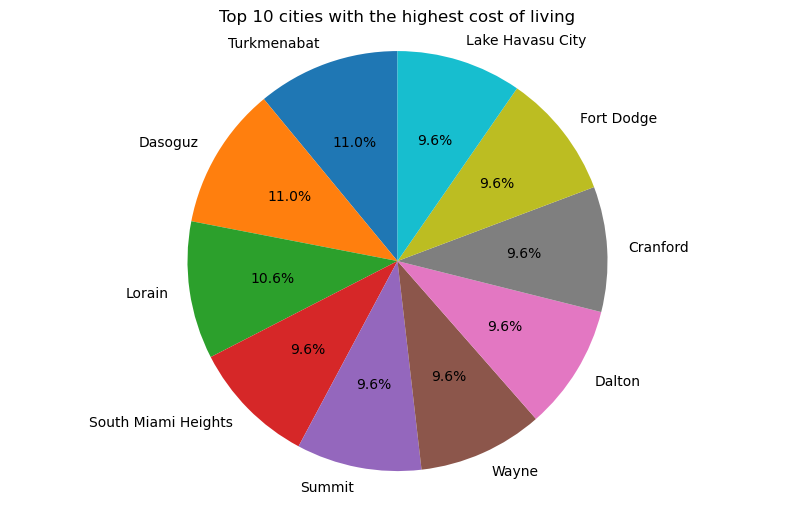

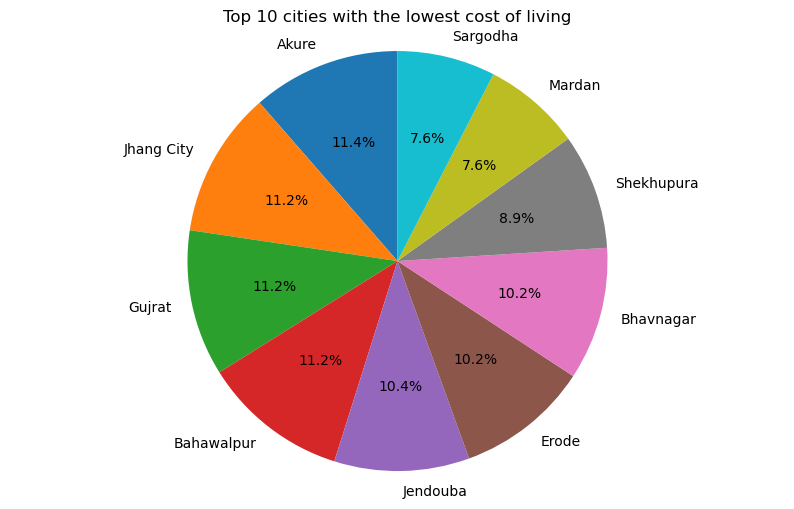

In [5]:


# Pie chart for the top 10 cities with the highest cost of living
plt.figure(figsize=(10, 6))
plt.pie(top_10_cities['x1'], labels=top_10_cities['city'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 cities with the highest cost of living')
plt.axis('equal')
plt.show()

# Pie chart for the bottom 10 cities with the lowest cost of living
plt.figure(figsize=(10, 6))
plt.pie(bottom_10_cities['x1'], labels=bottom_10_cities['city'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 cities with the lowest cost of living')
plt.axis('equal')
plt.show()


The two pie charts visualize the distribution of the highest and lowest cost of living among the top 10 cities.
The percentage values displayed inside each section of the pie represent the proportion of the cost of living value for each city relative to the total cost of living values for all cities in that particular category.

# How can we compare the variables 'x1'(Meal, Inexpensive Restaurant ) and 'x7'( Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)  for the first 7 unique countries using a scatter plot?

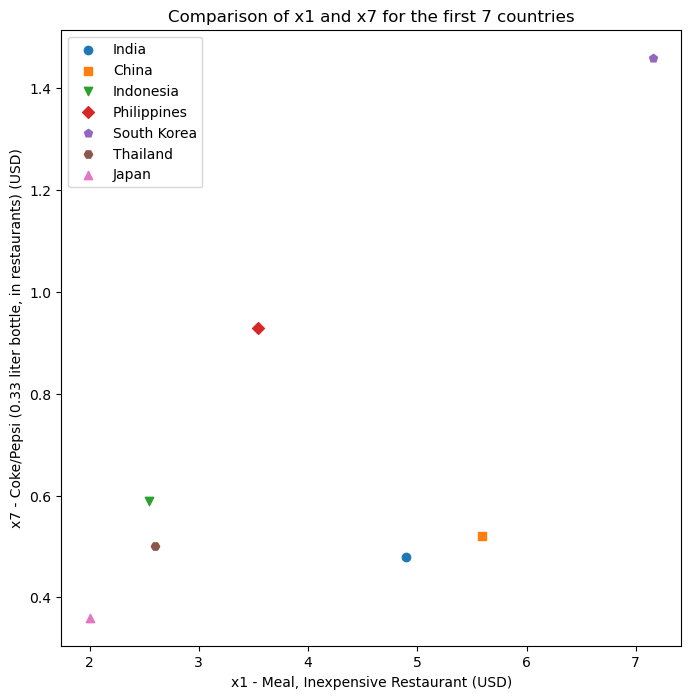

In [8]:
import matplotlib.pyplot as plt

# Select the first 7 countries from the dataset
countries = gcl['country'].unique()[:7]

# Filter the dataset for the selected countries
filtered_data = gcl[gcl['country'].isin(countries)]

# Select the 'x1' and 'x7' variables from the filtered dataset
x1 = filtered_data['x1']
x7 = filtered_data['x7']

# Create a list of markers to represent each country
markers = ['o', 's', 'v', 'D', 'p', 'H', '^']

plt.figure(figsize=(8, 8))

# Iterate over the countries and plot the 'x1' and 'x7' values with distinct markers
for i, country in enumerate(countries):
    plt.scatter(x1[i], x7[i], marker=markers[i], label=country)

plt.xlabel('x1 - Meal, Inexpensive Restaurant (USD)')
plt.ylabel('x7 - Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)')
plt.title('Comparison of x1 and x7 for the first 7 countries')
plt.legend()

plt.show()


Each point on the graph represents a specific country's data for the cost of a meal in an inexpensive restaurant and the cost of a Coke/Pepsi (0.33 liter bottle) in restaurants.The location of each point on the graph shows the specific values of the cost of a meal and the cost of a Coke/Pepsi for a particular country. For example, in India, the cost of a meal in an inexpensive restaurant is 4.9 USD, while the cost of a Coke/Pepsi (0.33 liter bottle) is 0.48 USD, indicating that the price of Coke/Pepsi is lower than that of a meal.

# Which are the top 5 cities based on the descending order of the 'x1'(Meal, Inexpensive Restaurant) variable?

In [7]:
# Sort the data by 'x1' variable in descending order
sorted_data = gcl.sort_values('x1', ascending=False).head(5)

# Rank the cities based on 'x1' variable
sorted_data['Rank'] = range(1, len(sorted_data) + 1) #generates a sequence of numbers from 1 to the length of the "sorted_data" DataFrame.

# Select the 'City' and 'x1' columns from sorted data
result = sorted_data[['city', 'x1', 'Rank']]

# Print the result
print(result)


             city     x1  Rank
1540      Dasoguz  56.98     1
1016  Turkmenabat  56.98     2
1810       Lorain  55.00     3
4428     Cranford  50.00     4
3328       Summit  50.00     5


We understand from the result that the city "Dasoguz" has the highest 'x1'(Meal, Inexpensive Restaurant (USD)) value of  56.98 and is ranked 1.


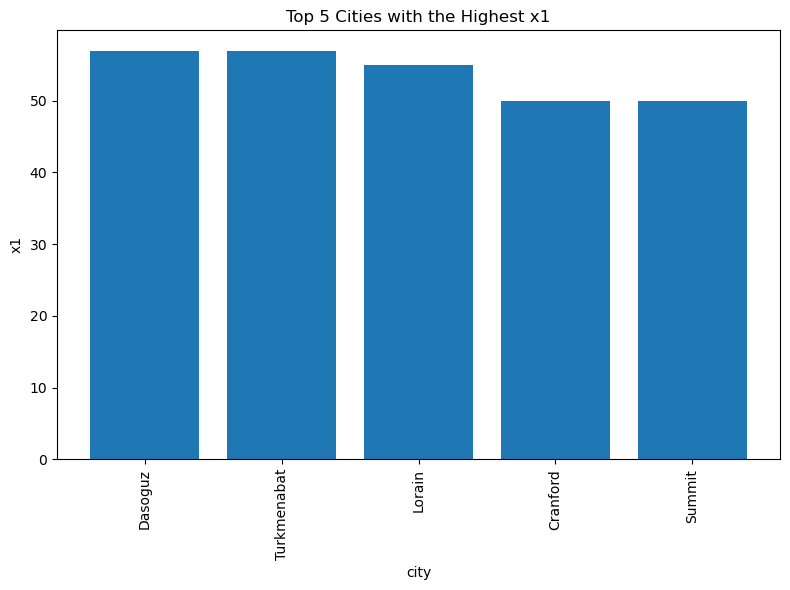

In [8]:
# Plot the graphic
plt.figure(figsize=(8, 6))
plt.bar(result['city'], result['x1'])
plt.xlabel('city')
plt.ylabel('x1')
plt.title('Top 5 Cities with the Highest x1')
plt.xticks(rotation=90)#rotates the x-axis labels by 90 degrees to prevent overlapping if the city names are long.
plt.tight_layout()
plt.show()


Bar chart representing the top 5 cities with the highest values for the 'x1' variable (Meal, Inexpensive Restaurant - USD)
Each bar corresponds to a city and its corresponding 'x1' value. The height of each bar represents the magnitude of the 'x1' value for the respective city.
 Based on the chart, the top 5 cities in descending order of the 'x1' variable are Dasoguz, Turkmenabat, Lorain, Cranford, and Summit. 

# Which is the most expensive variable, x1(Meal, Inexpensive Restaurant) or x2 (Meal for 2 People, Mid-range Restaurant, Three-course) ?

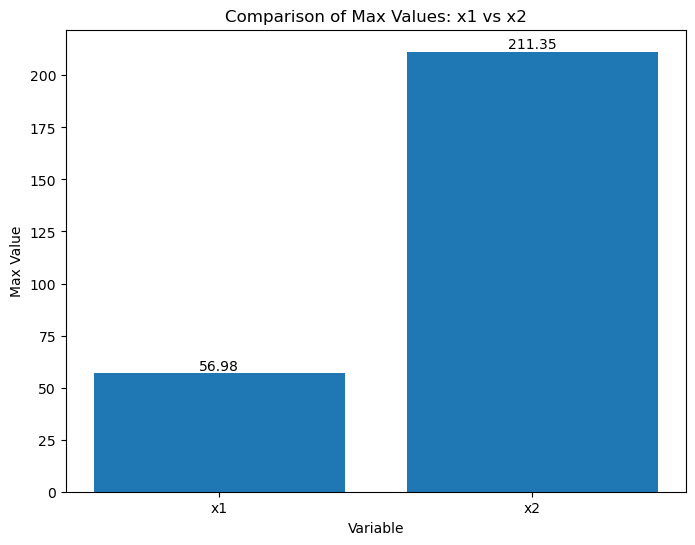

Meal for 2 People, Mid-range Restaurant, Three-course (USD) is more expensive than Meal, Inexpensive Restaurant (USD).


In [11]:
max_x1 = gcl['x1'].max()
max_x2 = gcl['x2'].max()
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['x1', 'x2'], [max_x1, max_x2])
plt.xlabel('Variable')
plt.ylabel('Max Value')
plt.title('Comparison of Max Values: x1 vs x2')

# Add labels to the bars
plt.text(0, max_x1, str(max_x1), ha='center', va='bottom')#text label for the max value of x1
plt.text(1, max_x2, str(max_x2), ha='center', va='bottom')

# Show the plot
plt.show()

# Compare the maximum values and print the result
if max_x1 > max_x2:
    print("Meal, Inexpensive Restaurant (USD) is more expensive thanMeal for 2 People, Mid-range Restaurant, Three-course (USD).")
else:
    print("Meal for 2 People, Mid-range Restaurant, Three-course (USD) is more expensive than Meal, Inexpensive Restaurant (USD).")

The bar chart visually depicts this comparison, where the height of the 'Meal for 2 People, Mid-range Restaurant, Three-course (USD)' bar is greater than the height of the 'Meal, Inexpensive Restaurant (USD)' bar. The labels on top of each bar indicate the exact value of the maximum for that variable

# What are the names of the first 15 cities where the value in the 'x4'(Domestic Beer (0.5 liter draught, in restaurants)) column is greater than 2?

In [12]:
cities_x4 = gcl[gcl['x4'] > 2].head(15)
cities_x4


,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46
5,5,Bangkok,Thailand,2.60,28.09,5.62,2.25,4.21,2.06,0.50
6,6,Kolkata,India,2.00,14.69,3.67,2.20,3.67,1.60,0.36
8,8,Mumbai,India,3.67,18.36,3.67,2.45,4.28,2.49,0.46
10,10,Osaka,Japan,7.22,43.31,5.47,3.25,3.61,3.19,1.17
12,12,Karachi,Pakistan,2.23,11.14,3.56,2.12,2.67,1.39,0.29
13,13,Dhaka,Bangladesh,1.87,11.24,4.68,5.62,4.92,1.89,0.27
14,14,Sao Paulo,Brazil,7.45,37.27,6.52,2.24,3.35,1.51,1.08
15,15,Tokyo,Japan,7.22,43.31,5.05,4.30,5.05,3.42,1.21


The first city that satisfies the condition 'x4' > 2 is Jakarta. The value of the variable for Jakarta is 2.02

C:\Users\user\AppData\Local\Temp\ipykernel_7812\1601304624.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = cities_x4.pivot('city', 'x4', 'x4')


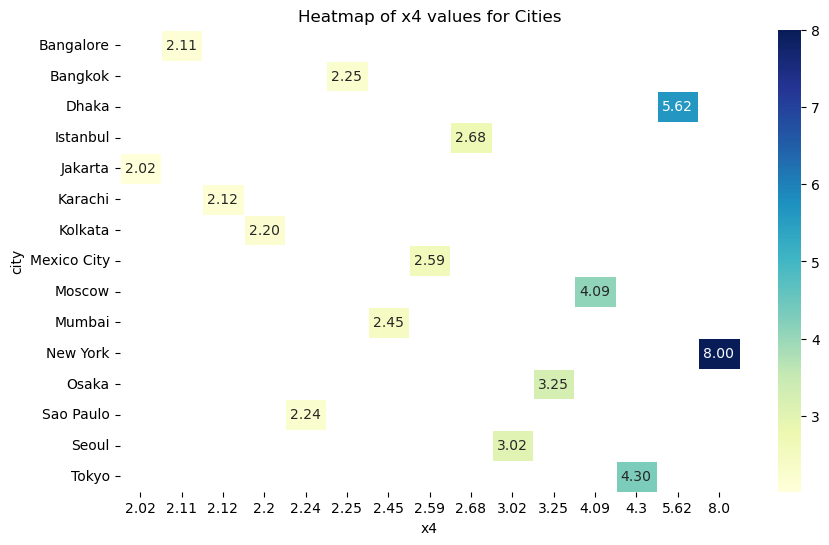

In [13]:
import seaborn as sns#for visualization
import matplotlib.pyplot as plt#for crating plots

# Filter the dataset based on x4 > 2
cities_x4 = gcl[gcl['x4'] > 2].head(15)
# Create a pivot table  for the heatmap using city,x4,x4 cloumns from the cities x4
heatmap_data = cities_x4.pivot('city', 'x4', 'x4')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of x4 values for Cities')
plt.xlabel('x4')
plt.ylabel('city')
plt.show()


Each city is represented by a row in the heatmap, and the corresponding 'x4' values (Domestic Beer - 0.5 liter draught, in restaurants - USD) are plotted along the columns. The color intensity in the heatmap represents the magnitude of the 'x4' values, with darker shades indicating higher values.

In the context of the specific example, the darker the color of a cell, the higher the 'x4' value for that city (e.g., New York). Conversely, the brighter the color, the lower the 'x4' value (e.g., Jakarta). The heatmap provides a visual representation of the 'x4' values across different cities, allowing for easy comparison of the magnitude of Domestic Beer costs in restaurants.

# Which cities have a price difference between 'x4'(Domestic Beer (0.5 liter draught, in restaurants))  and 'x5'(Imported Beer (0.33 liter bottle, in restaurants)) greater than 1?

In [14]:
cities_rise = gcl[gcl['x4'] - gcl['x5'] > 1]['city'] #filters the DataFrame gcl based on the condition 
#that the difference between the values in the 'x4' and 'x5' columns is greater than 1.  

# Count the occurrences of each city in cities rise Series 
city_counts = cities_rise.value_counts().sort_values(ascending=False)

# Convert  the city counts to DataFrame using "to frame" fuction 
city_table = city_counts.to_frame().reset_index()
city_table.columns = ['City', 'Count']

# Display the table
city_table


,City,Count
0,Paris,1
1,Papeete,1
2,Changchun,1
3,Riverside,1
4,Milan,1
...,...,...
363,Vandenberg Village,1
364,Pontotoc,1
365,Amalfi,1
366,Meilen,1


The table has 349 rows and includes cities such as Paris, Saint-Denis, Riverside, Milan, Rajkot, and many others, with each city occurring once in the dataset.

# Which cities have a value greater than 3 in the 'x4'(Domestic Beer (0.5 liter draught, in restaurants)) column?

In [15]:
cities_x4 = gcl[gcl['x4'] > 3]['city']
cities_x4

4              Seoul
10             Osaka
13             Dhaka
15             Tokyo
16            Moscow
            ...     
4862    Port Hedland
4864    Port Douglas
4865     Rockhampton
4867    Egilsstadhir
4872         Iqaluit
Name: city, Length: 2111, dtype: object

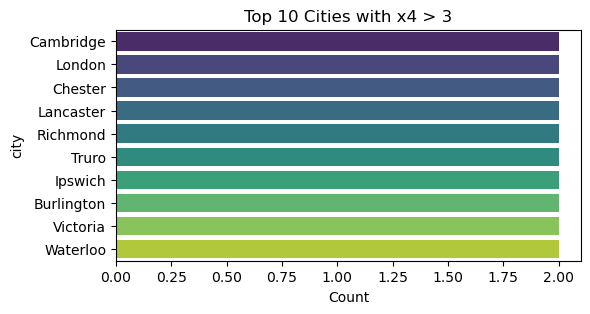

In [16]:
cities_x4 = gcl[gcl['x4'] > 3]['city']
# Count the occurrences of each city
city_counts = cities_x4.value_counts().sort_values(ascending=False)

# Select top 10 cities
top_10_cities = city_counts.head(10)

# Create the bar plot
plt.figure(figsize=(6, 3))
#use the seaborn library.
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('city')
plt.title('Top 10 Cities with x4 > 3')
plt.show()


It then selects the top 10 cities with the highest counts. The code creates a bar plot using seaborn library to visualize the count of occurrences for each city. The length of each bar indicates the frequency of occurrence for the corresponding city.The darker-colored bars represent cities with a higher count of occurrences,  indicating that they have more instances where the 'Domestic Beer (0.5 liter draught, in restaurants) (USD)' value exceeds 3. Conversely, the brighter-colored bars represent cities with a lower count, indicating that they have relatively fewer occurrences of 'Domestic Beer' values greater than 3.


# Which variable, 'x5'(Imported Beer (0.33 liter bottle, in restaurants)) or 'x6'(Cappuccino (regular, in restaurants) ), has the highest average value?

In [17]:
# Calculate the average values of x5 and x6 and assign it to varibale agv x5 and x6
avg_x5 = gcl['x5'].mean() ## Average value of Imported Beer (0.33 liter bottle, in restaurants) (USD)
avg_x6 = gcl['x6'].mean() ## Average value of Cappuccino (regular, in restaurants) (USD)


# Compare the average values
if avg_x5 > avg_x6:
    higher_avg = 'x5'
    print(avg_x5)
elif avg_x6 > avg_x5:
    higher_avg = 'x6'
    print(avg_x6)
else:
    higher_avg = 'x5 and x6 have the same average'

# Print the result
print("The average of", higher_avg, "is higher.")



3.878609163160356
The average of x5 is higher.


The result indicates that the average value of the 'Imported Beer (0.33 liter bottle, in restaurants) (USD)' variable is higher than the average value of the 'Cappuccino (regular, in restaurants) (USD)' variable. This suggests that, on average, the prices of Imported Beer tend to be greater than the prices of Cappuccino in the dataset.

To visually compare the average values of the 'Imported Beer' and 'Cappuccino' variables, we can create a bar plot.

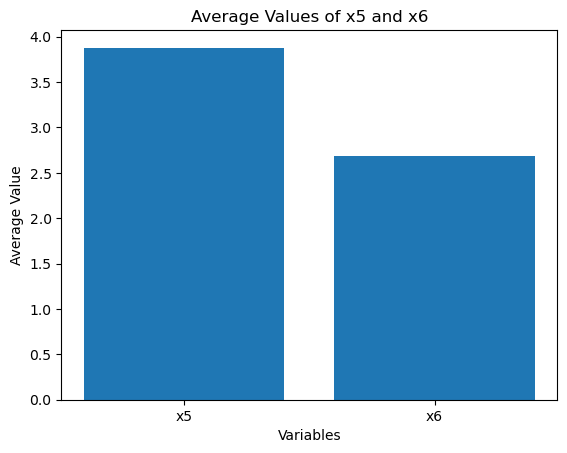

In [18]:
# Create a bar plot
labels = ['x5', 'x6']
values = [avg_x5, avg_x6]

plt.bar(labels, values)
plt.xlabel('Variables')
plt.ylabel('Average Value')
plt.title('Average Values of x5 and x6')

# Display the plot
plt.show()


As is evident from the bar plot, the bar representing 'Imported Beer (0.33 liter bottle, in restaurants) (USD)' (x5) is taller than the bar representing 'Cappuccino (regular, in restaurants) (USD)' (x6). This visual representation clearly indicates that the average value of x5 is higher than the average value of x6.

*We also fit a linear regression model to predict the 'x1' values based on the 'x2' values and evaluate the performance of the model using MSE. Using linear regression allows for interactive analysis, data visualization  and iterative development.

Mean Squared Error: 18.42419680411538


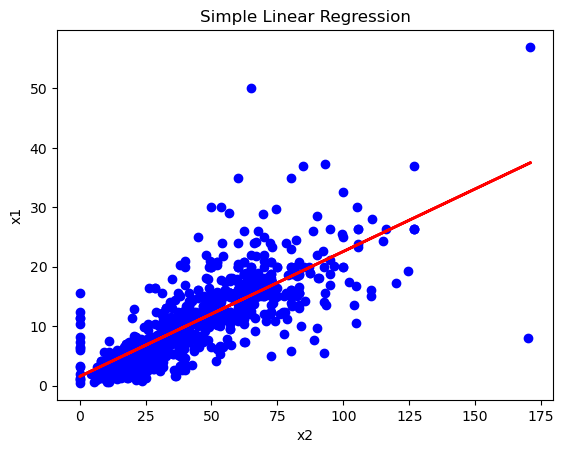

In [19]:
 #Select the columns for analysis and assign to X and Y 
X = gcl[['x2']].fillna(0)  # Fill null values with 0 
y = gcl['x1'].fillna(0)   

# Split the data into training and testing sets using  train test spilt
#*test_size=0.2 means that 20% of the data will be used for testing, while the remaining 80% will be used for training the model
#random_state=42 is an arbitrary choice. The specific value (42) is commonly used in examples to illustrate the concept
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) as an evaluation metric(compares the predicted values 'y_pred' with the actual values 'y_test'.)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the Linear Regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('x2')
plt.ylabel('x1')
plt.title('Simple Linear Regression')
plt.show()


The result indicates that the model's predictions for the dependent variable ('Meal, Inexpensive Restaurant (USD)') based on the independent variable ('Meal for 2 People, Mid-range Restaurant, Three-course (USD)') have a relatively higher average squared difference from the actual values. A MSE of 18.4242 might be considered relatively high, suggesting that the regression model may have room for improvement.
The points are plotted in blue color, indicating the actual values. The red line in the plot represents the predicted values of 'Meal, Inexpensive Restaurant (USD)' based on the linear regression model. The line represents the best-fit line that minimizes the difference between the predicted and actual values. The points that align closely to the red line indicate a good fit of the model.
On the other hand, the points that are more scattered and do not align well with the line suggest that the linear regression model may not be a good fit for the data.

# Can we predict the 5 cities with the higher values for x3( McMeal at McDonald's or an equivalent combo meal)?

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



# Drop rows with missing values
gcl.dropna(inplace=True)

# Label encode the 'city' column
label_encoder = LabelEncoder()
gcl['city_encoded'] = label_encoder.fit_transform(gcl['city'])

# Select the features for prediction
X = gcl[['city_encoded']]

# Select the target variable for prediction
y = gcl['x3']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the x3 values for all cities
gcl['x3_predicted'] = model.predict(X)

# Sort the data based on the predicted x3 values
sorted_data = gcl.sort_values('x3_predicted', ascending=False)

# Select the top 5 cities with the highest predicted x3 values
top_cities = sorted_data.head(5)

# Print the top 5 cities with their predicted x3 values
top_cities[['city', 'x3_predicted']]


,city,x3_predicted
2508,`Ibri,6.976765
898,`Ajman,6.976717
2242,Zwolle,6.976668
3555,Zwickau,6.976620
4048,Zvolen,6.976572


 The code predicts the x3 values, representing the cost of a McMeal at McDonald's or an equivalent combo meal, for different cities. The top 5 cities with the highest predicted x3 values are Ibri, Ajman, Zwolle, Zwickau, and Zvolen. This suggests that these cities are projected to have relatively higher costs for a McMeal at McDonald's or an equivalent combo meal compared to other cities in the dataset

Now, we will perform an Ordinary Least Squares (OLS) regression analysis to explore the relationship between the features x2(Meal for 2 People, Mid-range Restaurant, Three-course ), x3(McMeal at McDonalds (or Equivalent Combo Meal)), and x4(Domestic Beer (0.5 liter draught, in restaurants) ), and the target variable x1 in the given dataset."

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Select the features and target variable
X = gcl[['x2', 'x3', 'x4']].fillna(0)  
y = gcl['x1'].fillna(0)  

# Add a constant column to X (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2818.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:24:36   Log-Likelihood:                -11311.
No. Observations:                4055   AIC:                         2.263e+04
Df Residuals:                    4051   BIC:                         2.265e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7338      0.173    -10.044      0.0

R-squared: The coefficient of determination is 0.676, indicating that the model explains approximately 67.6% of the variance in the dependent variable (x3).

Adjusted R-squared: The adjusted R-squared is the same as the R-squared in this case since there are only three independent variables in the model.

F-statistic: The F-statistic is 2818, with a corresponding p-value of 0.00. This suggests that the overall model is statistically significant.

Coefficients: The coefficients represent the estimated slopes of the independent variables. In this case, we have four independent variables: constant, Meal for 2 People, McMeal at McDonald's, and Domestic Beer.

The constant (intercept) coefficient is -1.7338. This indicates the estimated mean value of the dependent variable (x3) when all independent variables are zero.

The coefficient for Meal for 2 People is 0.1412, suggesting that a one-unit increase in the Meal for 2 People variable results in a 0.1412 increase in the dependent variable (x3), holding other variables constant.

The coefficient for McMeal at McDonald's is 0.6114, indicating that a one-unit increase in the McMeal at McDonald's variable leads to a 0.6114 increase in the dependent variable (x3), assuming other variables remain constant.

The coefficient for Domestic Beer is 0.5228, suggesting that a one-unit increase in the Domestic Beer variable results in a 0.5228 increase in the dependent variable (x3), holding other variables constant.

Standard errors: The standard errors represent the variability or uncertainty associated with the estimated coefficients. Smaller standard errors indicate more precise estimates.

P-values: The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is zero. In this case, all p-values are 0.000, indicating that all coefficients are statistically significant.

Confidence intervals: The 95% confidence intervals provide a range of values within which the true population coefficients are likely to fall.

# References

https://www.kaggle.com/datasets/mvieira101/global-cost-of-living?select=cost-of-living.csv
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Data-Science3_ML.ipynb
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Data-science2_EDA.ipynb
https://stackoverflow.com/